# Make a hello world example on a 2-qubit Bell State
## 1) Map the problem to circuits and operators

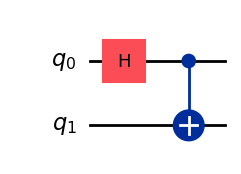

In [26]:
# credit to Derek Wang
# Hello World | Coding with Qiskit 1.x | Programming on Quantum Computers
# https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=5
# https://docs.quantum.ibm.com/guides/hello-world
from qiskit import QuantumCircuit  # get QuantumCircuit class


# CNOT gate
# https://en.wikipedia.org/wiki/Controlled_NOT_gate
# bell states
# https://quantumcomputinguk.org/tutorials/introduction-to-bell-states

# 1st, make quantum circuit, then make a bell state
# when two qubits are entangled, they are in a bell state

qc = QuantumCircuit(2)  # make quantum circuit with 2 qubits

qc.h(0)  # Hadamard gate on qubit 0 (this make a superposition)
qc.cx(0, 1)  # CNOT gate with control qubit 0 and target qubit 1

qc.draw('mpl')  # draw the circuit, mpl is matplotlib

In [27]:
from qiskit.quantum_info import Pauli  # get Pauli class

# These are observables used for measuring the bell state??
ZZ = Pauli('ZZ')  # make a Pauli object with label 'ZZ'
ZI = Pauli('ZI')  # make a Pauli object with label 'ZI'
IZ = Pauli('IZ')  # make a Pauli object with label 'IZ'
XX = Pauli('XX')  # make a Pauli object with label 'XX'
XI = Pauli('XI')  # make a Pauli object with label 'XI'
IX = Pauli('IX')  # make a Pauli object with label 'IX'

obersvables = [ZZ, ZI, IZ, XX, XI, IX]  # make a list of Pauli objects


# Step 3: Execute on backend 

In [28]:
# StatevectorEstimator
# https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorEstimator
# BaseEstimatorV2
# https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.BaseEstimatorV2

# make an instance of the simulator to run the quantum circuit
from qiskit.primitives import Estimator  # get Estimator
from qiskit.primitives import StatevectorEstimator  # get StatevectorEstimator

estimator = Estimator()  # make Estimator object
stateEstimator = StatevectorEstimator()  # make StatevectorEstimator object

# multriply number of quantum circuits by the number of observables
# this makes sure the number of observables is the same as the number of circuits
job = estimator.run([qc] * len(obersvables), obersvables)
stateJob = stateEstimator.run([(qc, obersvables)])

# get results 
print(f"job.result(): {job.result()}")
print(f"stateJob.result(): {stateJob.result()}")



job.result(): EstimatorResult(values=array([1., 0., 0., 1., 0., 0.]), metadata=[{}, {}, {}, {}, {}, {}])
stateJob.result(): PrimitiveResult([PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'target_precision': 0.0, 'circuit_metadata': {}})], metadata={'version': 2})


C:\Users\david\AppData\Local\Temp\ipykernel_34848\3258067759.py:10: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()  # make Estimator object


# Step 4: Post-processing and plotting 

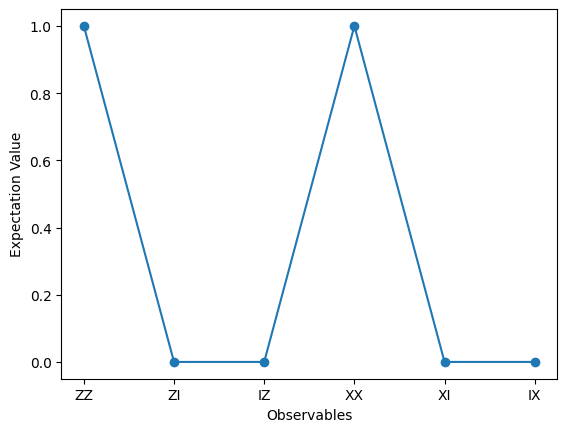

In [29]:
import matplotlib.pyplot as plt  # get pyplot from matplotlib

data = ["ZZ", "ZI", "IZ", "XX", "XI", "IX"]  # list of the labels for observables?
values = job.result().values  # get values from job result 
stateValues = stateJob.result() # get values from stateEstimator result

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Value')
plt.show()

# plt.plot(data, stateValues, '-o')
# plt.xlabel('Observables')
# plt.ylabel('Expectation Value')
# plt.show()

## Extend Hello World example to an $n$-qubit GHZ state

## Step 1: Map problem to circuits and operators

In [39]:
### want a function that will allow us to flexibly use any number of qubits 
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n) # make circtuit with n qubits 
    qc.h(0) # apply H-gate to 0th qubit
    
    # apply CNOT gates to all qubits
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc 

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
# qc.draw('mpl', fold=-1)

In [31]:
# the farther away the qubits are, the more noise we can expect
# let's write code to try and probe the noise on the ZZ operator
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + ('I' * i) + 'Z' + ('I' * (n - i - 2)) for i in range(n-1)]

# observe that this list starts with ZZ, and then each subsequent string has
# an increaseing number of I's between the first Z 
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for string in operator_strings]

['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

# Step 2: Optimize problem for quantum execution 

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


backend_name = "ibm_brisbane"  # get name of desired backend
backend = QiskitRuntimeService().backend(backend_name)  # get backend 
pass_manager = generate_preset_pass_manager(
    optimization_level=1, backend=backend)  # make pass manager

qc_transpiled = pass_manager.run(qc)  # run pass manager on quantum circuit
operators_transpiled_list = [op.apply_layout(
    qc_transpiled.layout) for op in operators]  # apply layout to operators


# Step 3: Execute on the backend

In [33]:
# from qiskit_ibm_runtime import EstimatorV2 as Estimator  # get EstimatorV2
# from qiskit_ibm_runtime import EstimatorOptions  # get EstimatorOptions

# options = EstimatorOptions()
# options.resilience_level = 1
# # options.optimization_level = 0  # 0 because transpilation was done earlier
# options.dynamical_decoupling.enable = True
# options.dynamical_decoupling.sequence_type = "XY4"

# estimator = Estimator(backend, options=options)  # make Estimator object

# job = estimator.run([(qc_transpiled, operators_transpiled_list)])
# job_id = job.job_id()
# print(job_id)

# Step 4: Post-Process and plot

In [ ]:
# job_id = 'cwaj8gaggr6g008cgapg' # old: cz2gtv31xvhg008dwg10, new: cz9j268b7tt0008g1z90
# service = QiskitRuntimeService()
# job = service.job(job_id)
# print(f'type(job): {type(job)}')
# print(f'job: {job}')

type(job): <class 'qiskit_ibm_runtime.runtime_job_v2.RuntimeJobV2'>
job: <RuntimeJobV2('cz9j268b7tt0008g1z90', 'estimator')>


type(job): <class 'qiskit_ibm_runtime.runtime_job_v2.RuntimeJobV2'>
job: <RuntimeJobV2('cz2gtv31xvhg008dwg10', 'estimator')>
job_id: cz2gtv31xvhg008dwg10
data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
type(result): <class 'qiskit.primitives.containers.pub_result.PubResult'>
result: PubResult(data=DataBin(evs=np.ndarray(<shape=(99,), dtype=float64>), stds=np.ndarray(<shape=(99,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(99,), dtype=float64>), shape=(99,)), metadata={'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})
values: [1.41369141 1.41369141 1.41369141 1.413691

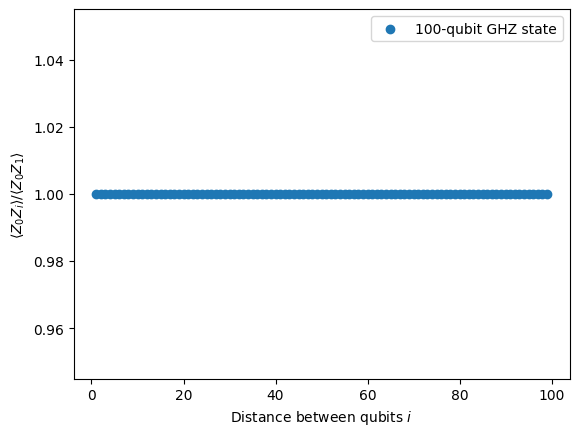

In [37]:
# cqq05tz267h000fj6qg, wang's old ID, was 4 days old. My old ID was 11 days old.. 
import matplotlib.pyplot as plt

job_id = 'cz2gtv31xvhg008dwg10' # old: cz2gtv31xvhg008dwg10, new: cz9j268b7tt0008g1z90
service = QiskitRuntimeService()
job = service.job(job_id)
print(f'type(job): {type(job)}')
print(f'job: {job}')

print(f'job_id: {job_id}')

data = list(range(1, len(operators) + 1))
# for i, op in enumerate(operators):
#     print(f'i: {i}')
#     print(f'op: {op}')
print(f'data: {data}')
result = job.result()[0]
print(f'type(result): {type(result)}')  
print(f"result: {result}")
values = result.data.evs
print(f'values: {values}')
values = [v / values[0] for v in values]
print(f'values: {values}')

plt.scatter(data, values, marker='o', label='100-qubit GHZ state')
plt.xlabel('Distance between qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$')
plt.legend()
plt.show()
